# 3章 一般化線形モデル(GLM)
* 「ばらつきは何でもかんでも正規分布」と考えるのはおかしいだろう
* 前の章では、平均種子数である$\lambda$は全個体で共通するものとした。
* この章では、個体ごとに異なる説明変数（個体の属性）によって平均種子数が変化する統計モデル、ポアソン回帰（一般化線形モデル）を扱う。

Q. ポアソン回帰（一般化線形モデル）とは何か？

A.
* 個体ごとに異なる説明変数（個体の属性）によって平均種子数が変化する統計モデル


## 3.1.例題：個体ごとに平均種子数が異なる場合
* データの違い：個体の大きさが様々( $x_i$ )。実験処理の有無( $f_i$ )。

## 3.2. 観測されたデータの概要を調べる

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs
import os
%matplotlib inline

In [16]:
work_dir = os.getcwd()
data_dir = work_dir + '/../data'

In [17]:
data = pd.read_csv(f"{data_dir}/chap3_data.csv",dtype={"y": int,"x":float, "f":"category"})

In [14]:
data

y      x  f
0    6   8.31  C
1    6   9.44  C
2    6   9.50  C
3   12   9.07  C
4   10  10.16  C
..  ..    ... ..
95   8   9.15  T
96   6   8.52  T
97   8  10.24  T
98   7  10.86  T
99   9   9.97  T

[100 rows x 3 columns]

In [15]:
data.shape

(100, 3)

### xのデータを表示させてみる

In [18]:
data.x

0      8.31
1      9.44
2      9.50
3      9.07
4     10.16
      ...  
95     9.15
96     8.52
97    10.24
98    10.86
99     9.97
Name: x, Length: 100, dtype: float64

### fのデータを表示させる

In [19]:
data.f

0     C
1     C
2     C
3     C
4     C
     ..
95    T
96    T
97    T
98    T
99    T
Name: f, Length: 100, dtype: category
Categories (2, object): ['C', 'T']

* pandas にもRのfactorと似た、Categoricalの型があるようです（[参照](http://qiita.com/TomokIshii/items/8acb138bd36e1b51b148))
* 「Category型のデータに対しては，cat(categoryの略)アクセサを通して，いくつかの関数（method）がサポートされている」とのこと

In [20]:
data.f.dtype

CategoricalDtype(categories=['C', 'T'], ordered=False)

### データの概要

In [21]:
data.describe()

y           x
count  100.000000  100.000000
mean     7.830000   10.089100
std      2.624881    1.008049
min      2.000000    7.190000
25%      6.000000    9.427500
50%      8.000000   10.155000
75%     10.000000   10.685000
max     15.000000   12.400000

In [22]:
data.f.describe()

count     100
unique      2
top         C
freq       50
Name: f, dtype: object

In [23]:
# data.fをcategory型として受け取らない場合、dataをintに変換する必要があるはず
# data.f[data.f == "C"] = "0"
# data.f[data.f == "T"] = "1"

### 散布図を描いてみよう

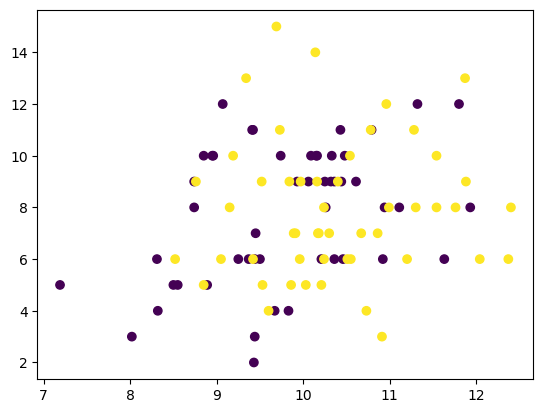

In [26]:
plt.scatter(data.x,data.y,c=data.f.cat.codes)

Q. 上の図から読み解けることは何か？

### 箱ひげ図を描いてみよう

<Axes: title={'center': 'y'}, xlabel='f'>

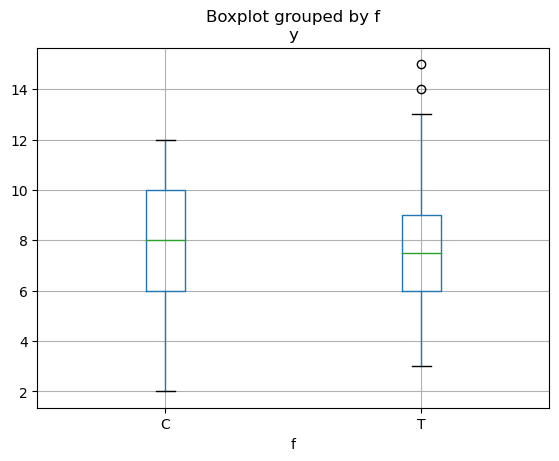

In [27]:
data.boxplot(column='y',by='f')

Q. 上の箱ひげ図から読み解けることは何か

## 3.4.ポアソン回帰の統計モデル

* 個体ごとの平均種子数 $\lambda_{i}$ が体サイズ $x$ や、 $f$ に影響されるようなモデルを設計する
* まず、ある個体 $i$ において種子数が $y_i$ である確率はポアソン分布に従い、下記。ここまでは第2章のモデルと同じ
$$
p(y_i|\lambda_i) = \frac{\lambda_i^{y_i}e^{-\lambda_i}}{y_i!}
$$

### 3.4.1. 線形予測子と対数リンク関数
* この個体ごとに異なる平均 $\lambda_i$ を説明変数 $x_i$の関数として下記のように定義してみる。
$$
\lambda_i = exp(\beta_1 + \beta_2 x_i)
$$

---
Q. $\beta_1$, $\beta_2$ をなんと呼ぶか。両方、それぞれで。

A.
* パラメーター
* 切片、傾き。

---

* 上の式を変更すると下記。
$$
\log \lambda_i = \beta_1 + \beta_2 x_i
$$
---
Q. 上の式の左辺と右辺をそれぞれなんと呼ぶか

A.

* リンク関数（対数リンク関数）と線形予測子

---
Q. ポアソン回帰で対数リンク関数を使う理由

A. 
 * 推定計算に都合が良い： $\lambda_i$ の値が0以上になる
 * わかりやすい：要因の効果が積で表される(3.6にて後述）
 
 
 ### 3.4.2. あてはめとあてはまりの良さ
 

Q. 尤度 $L(\lambda)$ はなんだったか（2章）


A. 
* ( $y_1$ が2である確率) $\times$ ( $y_2$ が2である確率) $\times$ ... $\times$ ( $y_{50}$ が3である確率)

---
* モデルの対数尤度は下記
$$
\log L(\beta_1,\beta_2) = \sum_i \log \frac{\lambda_i^{y_i}exp({-\lambda_i})}{y_i!}
$$

### 最尤推定値を求めよう

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm('y ~ x',data=data,family=sm.families.Poisson())

In [29]:
result = model.fit()

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Sun, 18 Jun 2023   Deviance:                       84.993
Time:                        17:31:36   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04414
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

Q. $\beta_1$ , $\beta_2$はどれか。

A.
* coefのinterceptが$\beta_1$, xが$\beta_2$

---
Q. 上の表から読み解けることは何か

---
* p51のz value、Pr(>|z|)はよくわからない。
* z valueは、最尤推定値をSEで除した値(Wald 統計量)
    * SEが大きければ大きいほど小さくなる
    * 推定値がゼロから十分に離れているかどうかの目安とすることで、このパラメーターを予測に用いるべきかを判断する？
* P>|z|は、平均がzで標準偏差1の正規分布における。マイナス無限大から0までの値をとる確率の２倍。この数字が大きいほどz値がゼロに近くなる 

In [32]:
# 計算で求めるなら下記
result.params / result.bse

Intercept    3.551742
x            2.125084
dtype: float64

* Pr(>|z|)　はこのglm()の場合では、平均がz値の最大値であり標準偏差が1の正規分布における、マイナス無限大からゼロまでの値をとる確率の2倍
    * 推定値の信頼区間が近似的に算出されたと考えて、そのように結果を解釈するのが良い
* ある説明変数をモデルに含めるべきか否かの判断には、Wald信頼区間ではなく、4章のモデル選択を用いた方が良い。
    * モデル選択は、より良い予測をする統計モデルを探し出そうとするもの。「この説明変数を入れるかどうか」は予測の改善を目的としているため。
    * では、Wald信頼区間はどんな時に用いる？
---
### 最大対数尤度は

In [33]:
result.llf #llfがなんの略かわからない。log likelihood

-235.3862507698608

### 自由度は？
* PythonとRでは表示される数値が違いそう（[参照](http://www.statsmodels.org/stable/regression.html))
* df_model : float The model degrees of freedom. This is equal to p - 1, where p is the number of regressors. Note that the intercept is not counted as using a degree of freedom here.
* df_resid : float The residual degrees of freedom. This is equal n - p where n is the number of observations and p is the number of parameters. Note that the intercept is counted as using a degree of freedom here.


In [34]:
result.df_model

1

### 3.4.3 ポアソン回帰モデルによる予測
#### 予測を図示してみよう
* 平均種子数 $\lambda$ を予測する
* 現時点では$f$の有無は予測に組み込まれてない(グラフ上で色分けはされているが）

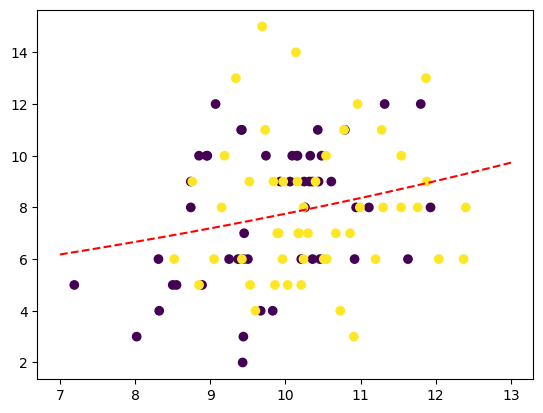

In [35]:
x= np.linspace(7,13,100)
y = np.exp(result.params["Intercept"] + x*result.params["x"])

plt.scatter(data.x,data.y,c=data.f.cat.codes)
plt.plot(x,y,"r--")
plt.show()

* result.predictを用いて、下記のようにも書くことができる

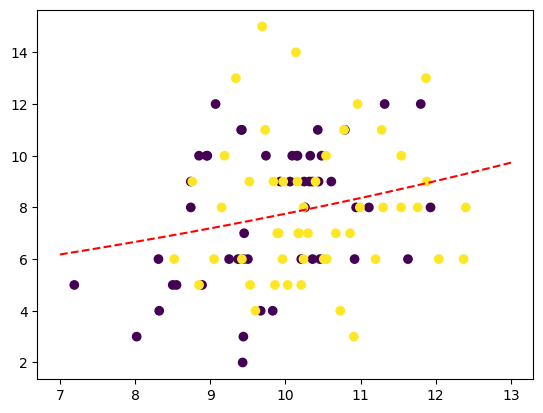

In [36]:
x = np.linspace(7,13,100)

plt.scatter(data.x,data.y,c=data.f.cat.codes)
plt.plot(x,result.predict({"x":x}),"r--")
plt.show()

## 3.5.説明変数が因子型の統計モデル
* 因子型の説明変数を含む線形予測子はダミー変数に置き換える
* 式としては下記
$$
\lambda_i = exp(\beta_1 + \beta_3 d_i)
$$


$$
\begin{eqnarray}
d_i = \left\{\begin{array}{ll}
0&(when&f_i = C)\\
1&(when&f_i = T)\\
\end{array} \right.
\end{eqnarray}
$$

* つまり、$f_i = C$ の場合は
$$
\lambda_i = exp(\beta_1)
$$

* $f_i = T$の場合は
$$
\lambda_i = exp(\beta_1 + \beta_3)
$$

In [38]:
model = smf.glm('y ~ f',data=data,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Sun, 18 Jun 2023   Deviance:                       89.475
Time:                        17:38:54   Pearson chi2:                     87.1
No. Iterations:                     4   Pseudo R-squ. (CS):          0.0003192
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0516      0.051     40.463      0.000       1.952       2.151
f[T.T]         0.0128      0.071      0.179      0.858      -0.127       0.153
==============================================================================
"""

### 最大対数尤度は？

In [39]:
result.llf

-237.62725696068685

Q. 前述のサイズ $x_i$のモデルの最大対数尤度と比較してどうなっているか？

A.
* 最大対数尤度が小さくなっており、あてはまりが悪くなっている

---

* 機会があれば、3水準の因子型の説明変数を使って試してみよう

## 3.6.説明変数が数量型+因子型の統計モデル
*  個体のサイズ$x_i$ と施肥効果$f_i$の複数の説明変数を同時に組み込む
$$
\log \lambda_i = \beta_1 + \beta_2 x_i + \beta_3 d_i
$$

#### データの確認

In [40]:
data.head()

y      x  f
0   6   8.31  C
1   6   9.44  C
2   6   9.50  C
3  12   9.07  C
4  10  10.16  C

#### モデルをつくる

In [41]:
model = smf.glm('y ~ x + f',data=data,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Sun, 18 Jun 2023   Deviance:                       84.808
Time:                        17:39:34   Pearson chi2:                     83.8
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04590
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2631      0.370      3.417      0.001       0.539       1.988
f[T.T]        -0.0320      0.074     -0.430      0.667      -0.178       0.114
x              0.0801      0.037      2.162      0.031       0.007       0.153
==============================================================================
"""

Q. 上の表から読み取れることは何か？

A.
* 例：fの効果はこのモデルだとマイナス、先ほどだとプラス。効果はあるのか？

#### 最大対数尤度は？

In [42]:
result.llf

-235.29371924249367

* $x_i$だけを用いたモデルの最大対数尤度（-235.4)よりあてはまりがよくなっている

#### 自由度は？

In [43]:
result.df_model

2

### 3.6.1.対数リンク関数のわかりやすさ：かけ算される効果
* 説明変数は応答変数にどのように影響を与えるか？
    * 対数リンク関数を使っているので、足し算ではなくかけ算で要因が平均に効果を及ぼす
    
    
* パラメータ推定ができればどんなモデルでもいい、という発想をやめて、数式が現象をどのように表現しているのかという点に注意しながら統計モデルを設計すること

## 3.7. 「なんでも正規分布」「なんでも直線」には無理がある
Q. 図3.9は同じ散布図に対して、直線回帰とポアソン回帰を当てはめたもの。直線回帰の問題点をあげよ。

A.
* 正規分布は連続的な値を扱う確率分布
* カウントデータなのに平均値の予測がマイナスになっている
* 図では「ばらつき一定」ではなさそうだが、分散一定を過程？

言うなれば、
* 現実離れした統計モデルを使っているので、解析そのものに意味がない

---
* ポアソン回帰であれば
    * ポアソン分布はカウントデータに対応
    * 対数リンク関数を使えば、平均値は常に非負
    * $y$のばらつきは平均とともに増える


* なお、応答変数 $y$を$\log y$のように変数変換して直線回帰することとポアソン回帰は別物
    * $y$の構造に合わせて適切な確率分布を選ぶのがこの書籍の方針

## 3.8.この章のまとめと参考文献
* 統計モデルを作るにはデータを図示することが大切
* GLMは確率分布・リンク関数・線形予測子を指定する統計モデル
* 統計モデルの因子型の説明変数は、ダミー変数という考え方で理解できる
* 説明変数の効果はそれぞれの積として表現
* なんでも正規分布、なんでも直線には無理がある

---
### 課題
* 3つの説明変数でポアソン回帰をやってみよう

* sklearnにあるサンプルデータで試してみた
    * ノースカロライナ州立大学の A. C. linnerud 博士が作成した、20 人の成人男性に対してフィットネスクラブで測定した 3 つの生理学的特徴と 3 つの運動能力の関係。([参照](http://pythondatascience.plavox.info/scikit-learn/scikit-learn%E3%81%AB%E4%BB%98%E5%B1%9E%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88))
* 腹筋の回数を、体重、ウエスト、脈拍に対して当てはめる。

In [44]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()

In [45]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [46]:
df_csj = pd.DataFrame(linnerud.data,columns=linnerud.feature_names)

In [47]:
df_csj.head()

Chins  Situps  Jumps
0    5.0   162.0   60.0
1    2.0   110.0   60.0
2   12.0   101.0  101.0
3   12.0   105.0   37.0
4   13.0   155.0   58.0

In [48]:
df_wwp = pd.DataFrame(linnerud.target,columns=linnerud.target_names)

In [49]:
df_wwp.head()

Weight  Waist  Pulse
0   191.0   36.0   50.0
1   189.0   37.0   52.0
2   193.0   38.0   58.0
3   162.0   35.0   62.0
4   189.0   35.0   46.0

In [50]:
df_wwp["Chins"] = df_csj.Chins

In [51]:
df_wwp.head()

Weight  Waist  Pulse  Chins
0   191.0   36.0   50.0    5.0
1   189.0   37.0   52.0    2.0
2   193.0   38.0   58.0   12.0
3   162.0   35.0   62.0   12.0
4   189.0   35.0   46.0   13.0

In [52]:
model = smf.glm('Chins ~ Weight + Waist + Pulse',data=df_wwp,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Chins   No. Observations:                   20
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -60.048
Date:                Sun, 18 Jun 2023   Deviance:                       42.548
Time:                        17:41:01   Pearson chi2:                     39.8
No. Iterations:                     4   Pseudo R-squ. (CS):             0.6775
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7521      1.503      5.157      0.000       4.806      10.698
Weight         0.0067      0.006      1.168      0.243      -0.005       0.018
Waist         -0.1807      0.049     -3.654      0.000      -0.278      -0.084
Pulse         -0.0068      0.010     -0.677      0.499      -0.027       0.013
==============================================================================
"""

In [53]:
df_wwp["predict"] = result.predict(df_wwp[["Weight","Waist","Pulse"]])

In [54]:
df_wwp

Weight  Waist  Pulse  Chins    predict
0    191.0   36.0   50.0    5.0   8.946231
1    189.0   37.0   52.0    2.0   7.267619
2    193.0   38.0   58.0   12.0   5.981289
3    162.0   35.0   62.0   12.0   8.122894
4    189.0   35.0   46.0   13.0  10.867774
5    182.0   36.0   56.0    4.0   8.081955
6    211.0   38.0   56.0    8.0   6.844403
7    167.0   34.0   60.0    6.0  10.202940
8    176.0   31.0   74.0   15.0  16.936457
9    154.0   33.0   56.0   17.0  11.510169
10   169.0   34.0   50.0   17.0  11.073281
11   166.0   33.0   52.0   13.0  12.824211
12   154.0   34.0   64.0   14.0   9.096078
13   247.0   46.0   50.0    1.0   2.141217
14   193.0   36.0   46.0    6.0   9.318954
15   202.0   37.0   62.0   12.0   7.407542
16   176.0   37.0   54.0    4.0   6.568441
17   157.0   32.0   52.0   11.0  14.460827
18   156.0   33.0   54.0   15.0  11.826804
19   138.0   33.0   68.0    2.0   9.520914

Text(0, 0.5, 'Predict')

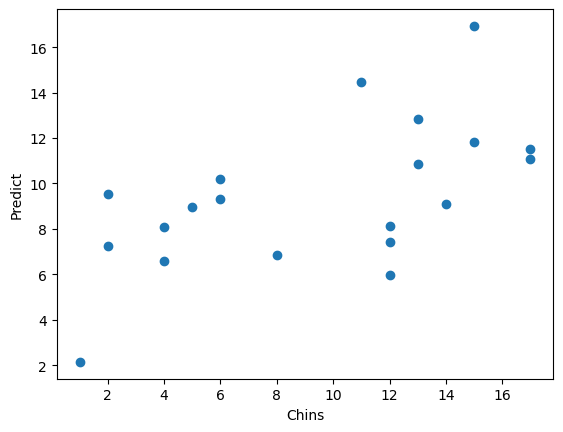

In [55]:
plt.scatter(df_wwp.Chins,df_wwp.predict)
plt.xlabel("Chins")
plt.ylabel("Predict")

* ウエストに対して負の係数がかかっているのは感覚と近い。
* 既存データで学習し、既存データで当てはまりを見ているので一致しやすいのは当然。未来のデータに対する当てはまりの良さについては今後